In [1]:
import pandas as pd
import numpy as np
import json
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from aux_funcs import *

In [3]:
df = pickle.load(open('df', 'rb'))
arima_parameters = json.load(open('arima_parameters.json', 'r'))
std_innovations = arima_parameters['std']
np.random.seed(0)

In [4]:
#Initialize option class
option = american_option(df, 24, 50000, std_innovations)

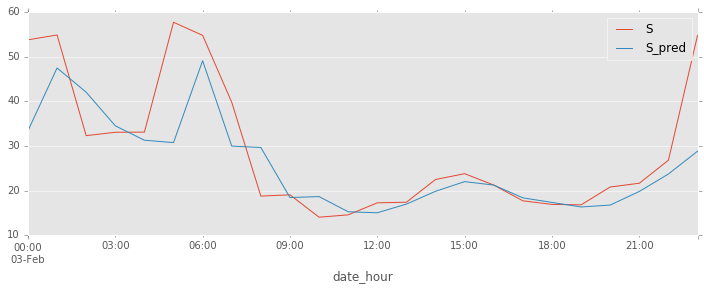

In [5]:
option.plot_real_predicted_values('2017-02-03 00:00:00')

In [6]:
df_mc = option.generate_random_paths('2017-02-03 00:00:00', generate_sn)

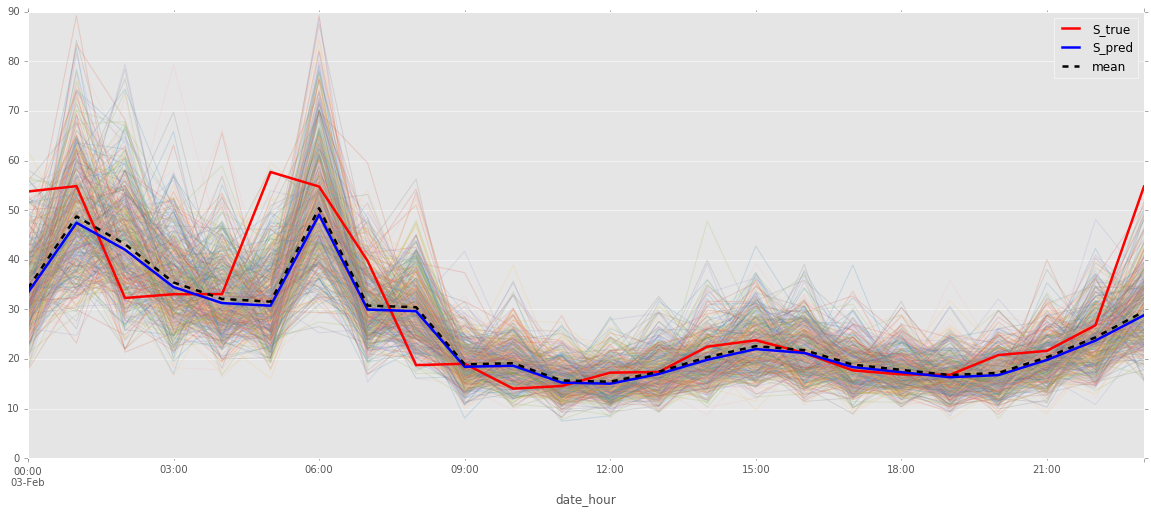

In [7]:
option.plot_montecarlo()

In [8]:
#Compute option value
option.compute_option_value(20, 3, compute_mcs_amer_option)

35.549890783857187

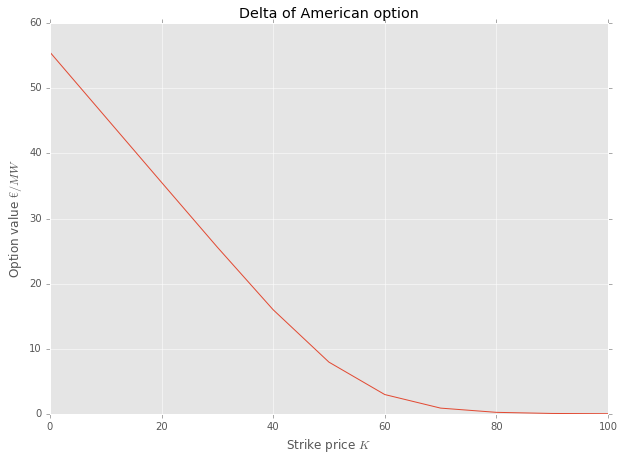

In [9]:
#Delta of the option
K = np.linspace(0,100,11)
C_list = option.compute_option_value(K,3, compute_mcs_amer_option)
option.plot_delta_option(K, C_list)

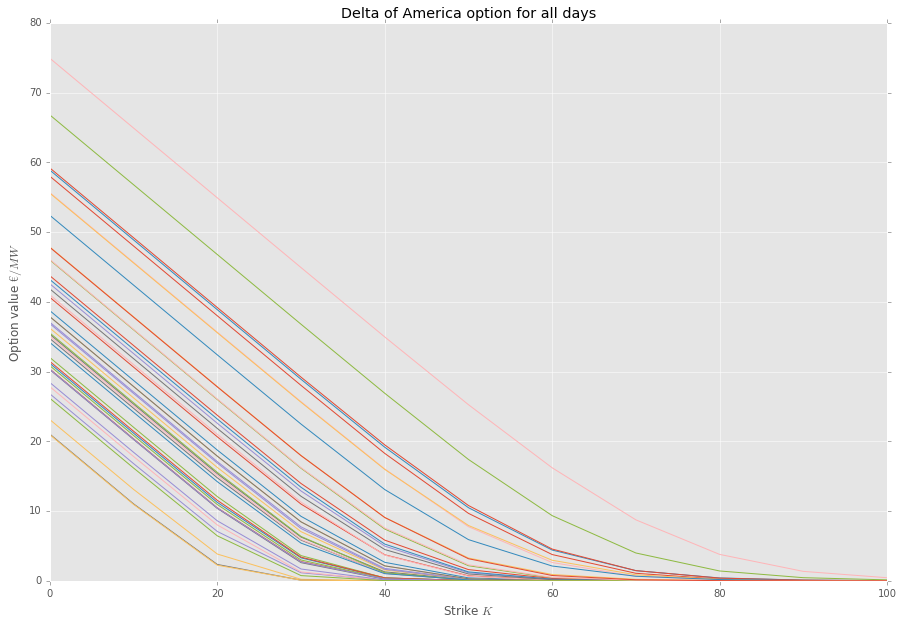

In [12]:
#Delta of America option for all days 
date_list = list()
fig, ax = plt.subplots(1,1, figsize=(15,10))
for i in range(int(len(df)/24)):
    date = df.index[i*24]
    _ = option.generate_random_paths(date, generate_sn)
    ax.plot(K, option.compute_option_value(K,3,compute_mcs_amer_option))
    ax.set_title('Delta of America option for all days')
    ax.set_xlabel('Strike $K$')
    ax.set_ylabel('Option value $€/MW$')